In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score ,precision_score,recall_score,f1_score

from matplotlib import pyplot as plt

In [33]:
df = pd.read_csv("/content/iris.csv")

In [34]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
df.shape

(150, 5)

In [37]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [39]:
df.duplicated().sum()

3

In [40]:
df.drop_duplicates(inplace=True)

In [41]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [42]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

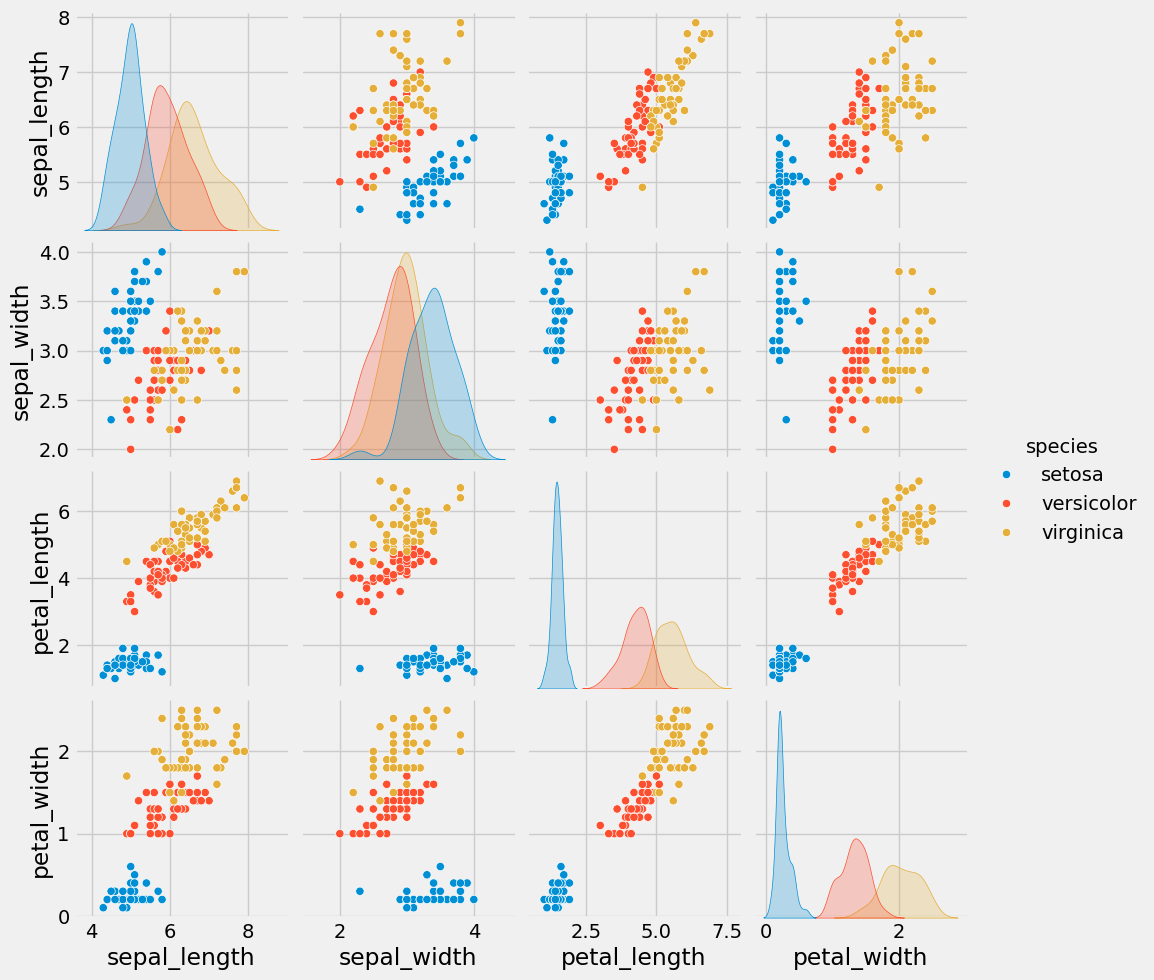

In [50]:
sns.pairplot(df, hue = 'species')
plt.show()

<Axes: >

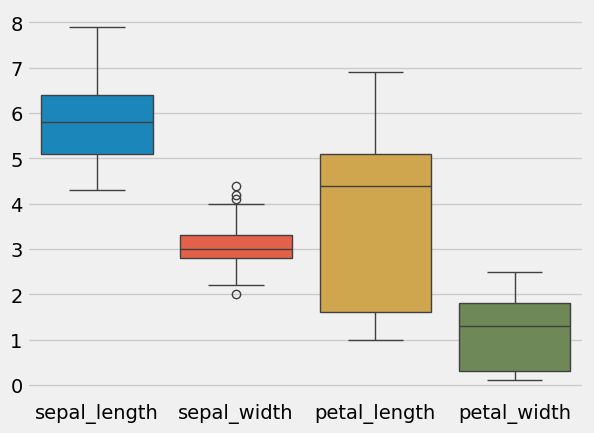

In [43]:
sns.boxplot(data = df)

<Axes: xlabel='sepal_width'>

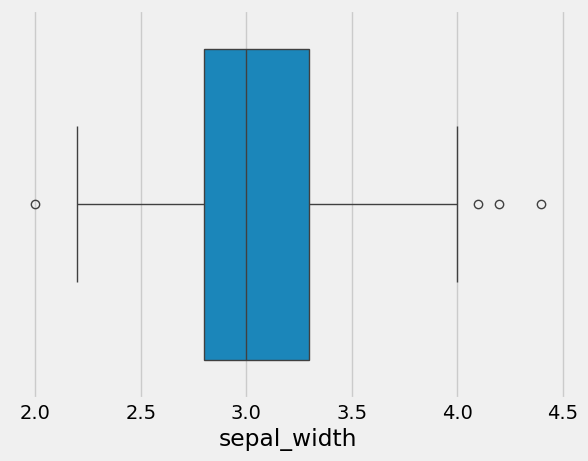

In [44]:
sns.boxplot(x = 'sepal_width', data = df)

Old Shape:  (147, 5)
New Shape:  (143, 5)


<Axes: xlabel='sepal_width'>

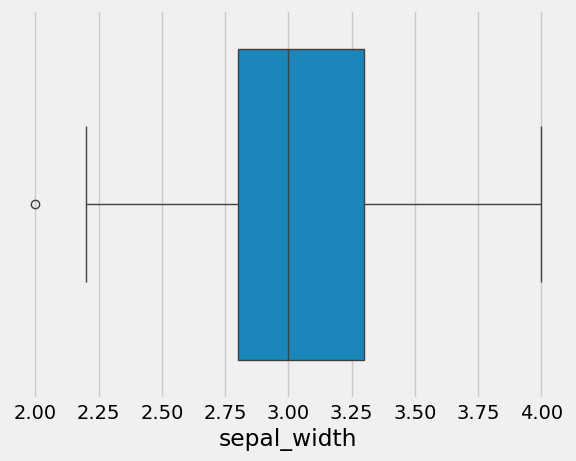

In [45]:
#Removing outliers using IQR
Q1 = np.percentile(df['sepal_width'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['sepal_width'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print('Old Shape: ', df.shape)

upper = np.where(df['sepal_width'] >= (Q3+1.5*IQR))
lower = np.where(df['sepal_width'] <= (Q1-1.5*IQR))
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
print('New Shape: ', df.shape)

sns.boxplot(x = 'sepal_width', data = df)

<Axes: xlabel='sepal_length', ylabel='petal_length'>

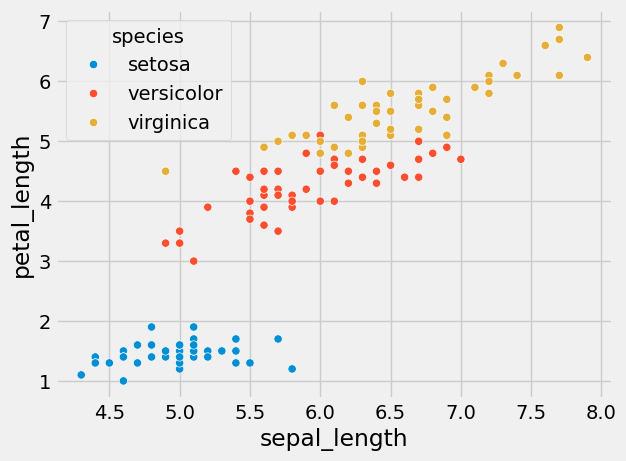

In [46]:
sns.scatterplot(data=df, x="sepal_length", y="petal_length", hue="species")

<Axes: xlabel='petal_width', ylabel='Count'>

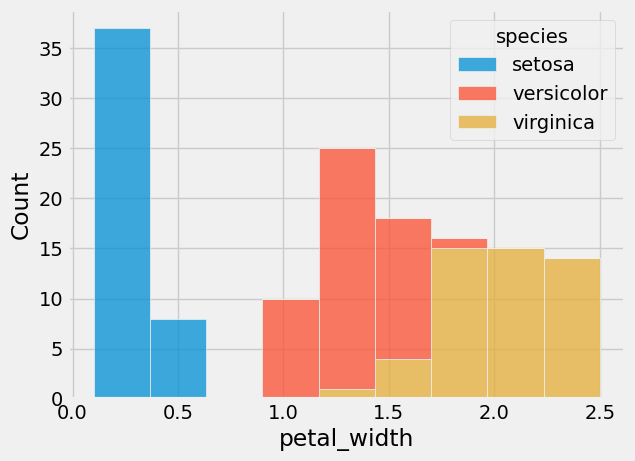

In [47]:

sns.histplot(data=df, x="petal_width", hue="species", multiple="stack")

<ipython-input-48-5872d05efd2d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='sepal_width', y='species', inner='stick', palette='Dark2')


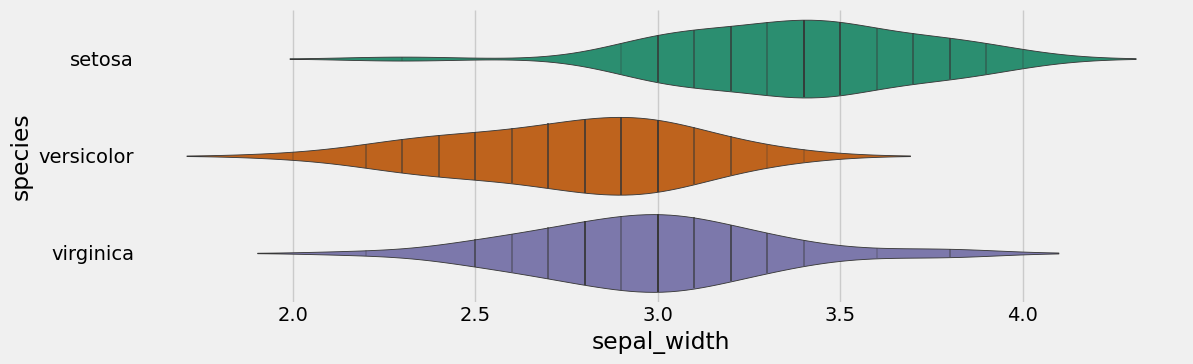

In [48]:

figsize = (12, 1.2 * len(df['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='sepal_width', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)